The table contains data for 45 Walmart stores. Their weekly sales, air temperature and fuel prices in the region where a particular store is located. As well as information on the consumer price index and unemployment rate.

#### Column Discription
- Store       : Store number 
- Date        : Sales week start date 
- Weekly_Sales: Store week sales 
- Holiday_Flag: Mark on the presence or absence of a holidaym 
- Temperature : Air temperature in the region 
- Fuel_Price  : Fuel cost in the region 
- CPI         : Consumer price index 
- Unemployment: Unemployment rate 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "C:/Users/sidiq/OneDrive/Desktop/GIT HUB PROJECTS/WALMART-SALES/Walmark-Sales-Analysis/DATA/Walmart_sales.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [6]:
df.shape

(6435, 8)

In [7]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['Date'].dtype

dtype('O')

In [10]:
# Convert the object column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Date'].dtype

dtype('<M8[ns]')

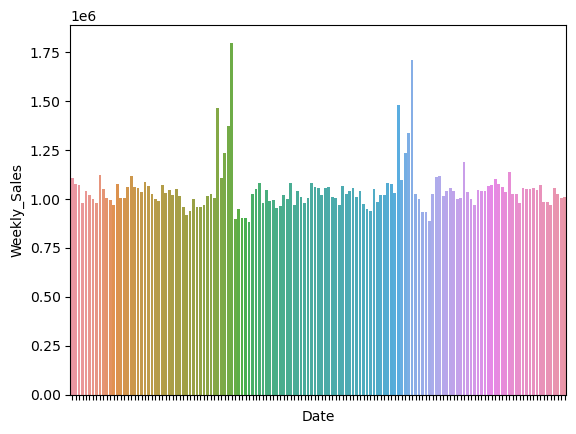

In [11]:
sns.barplot(df, x="Date", y="Weekly_Sales", errorbar=None)
# Remove the x labels
plt.gca().set_xticklabels([])

# Show the plot
plt.show()

#### Highest and lowest Weekly_Sales

In [12]:
df[df['Weekly_Sales'] == df['Weekly_Sales'].max()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.54459,8.724


In [13]:
df[df['Weekly_Sales'] == df['Weekly_Sales'].min()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4619,33,2010-12-03,209986.25,0,52.82,3.041,126.731333,9.265


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Count'>

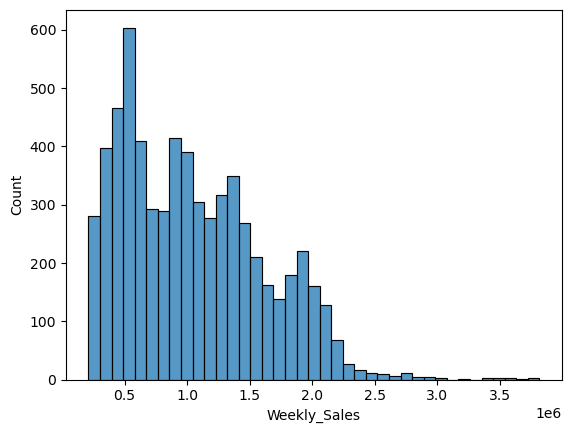

In [14]:
sns.histplot(data=df, x="Weekly_Sales")

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

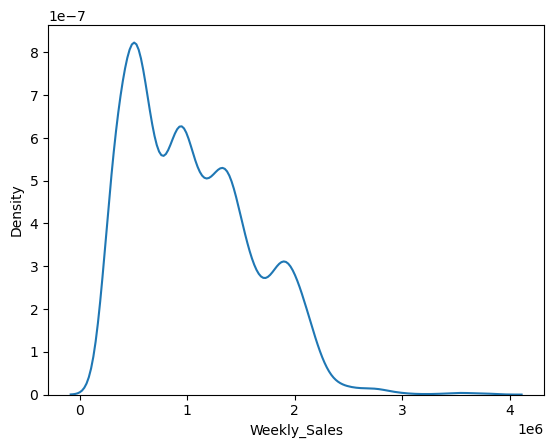

In [15]:
sns.kdeplot(data=df, x="Weekly_Sales")

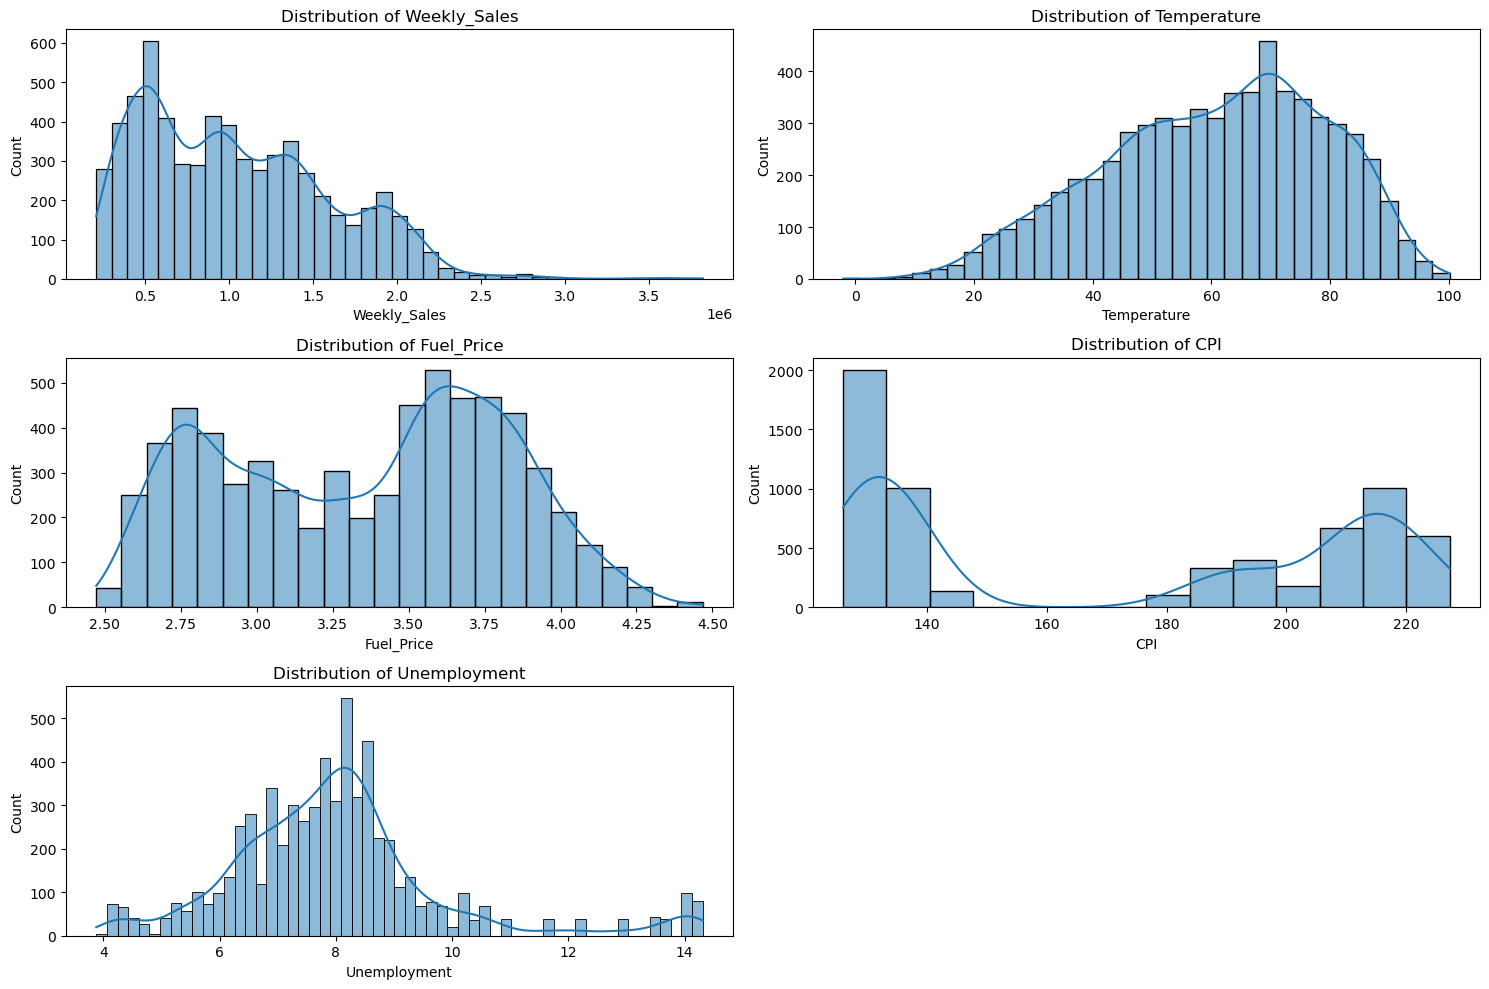

In [16]:
# List of columns to plot
columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through the columns and create a subplot for each column
for i, column in enumerate(columns, 1):
    plt.subplot(3, 2, i)  # Create a subplot in a 3x2 grid
    sns.histplot(df[column], kde=True)  # Plot the histogram with a KDE
    plt.title(f'Distribution of {column}')  # Set the title for each subplot

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()

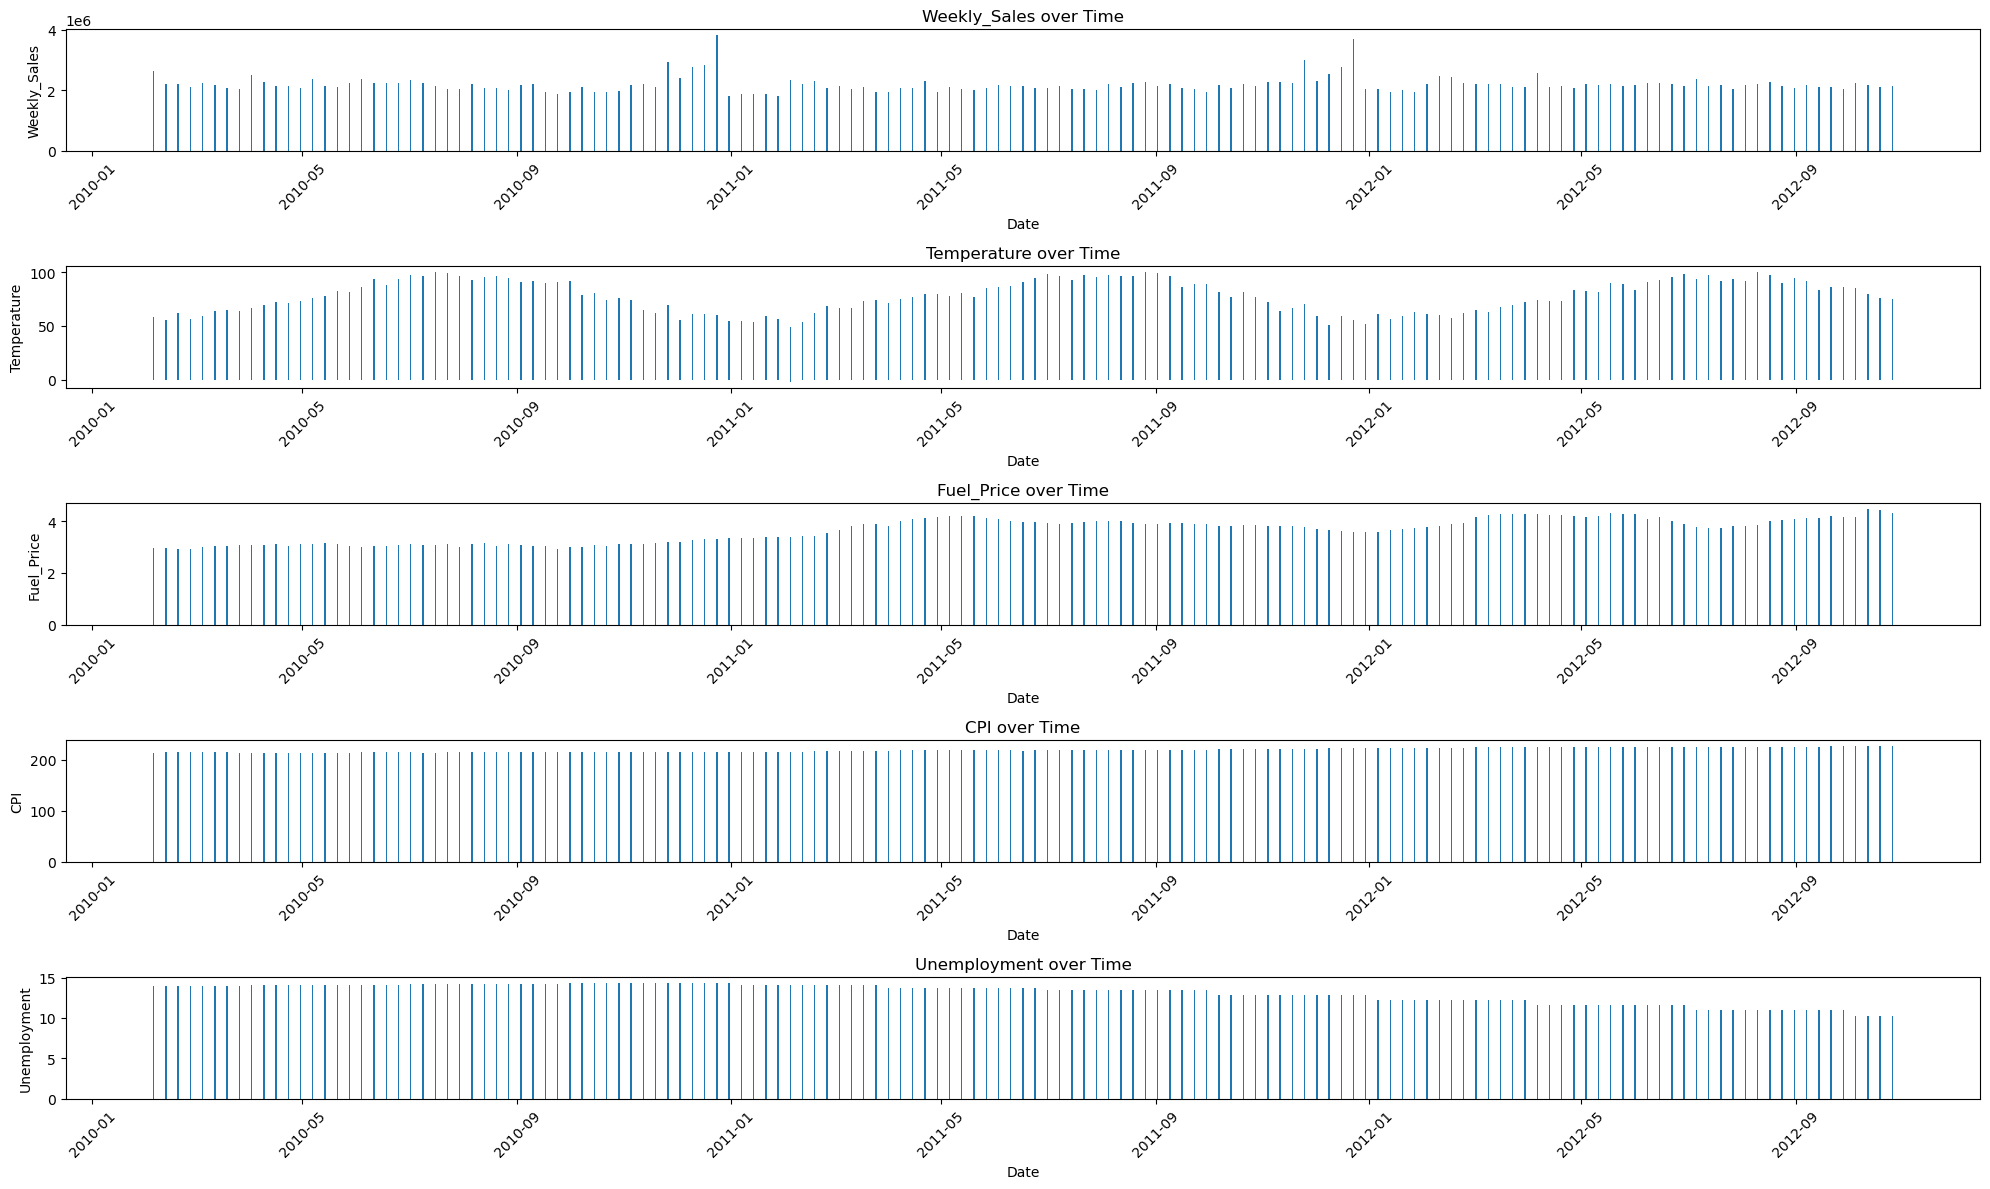

In [17]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 12))

# Loop through the columns and create a subplot for each column
for i, column in enumerate(columns, 1):
    plt.subplot(len(columns), 1, i)  # Create a subplot for each column
    
    # Plot the bar graph for the column
    plt.bar(df['Date'], df[column], width=0.8)  # Adjust width as needed
    
    plt.title(f'{column} over Time')  # Set the title for each subplot
    plt.xlabel('Date')
    plt.ylabel(column)
    
    # Rotate date labels for better readability
    plt.xticks(rotation=45)
    
plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()

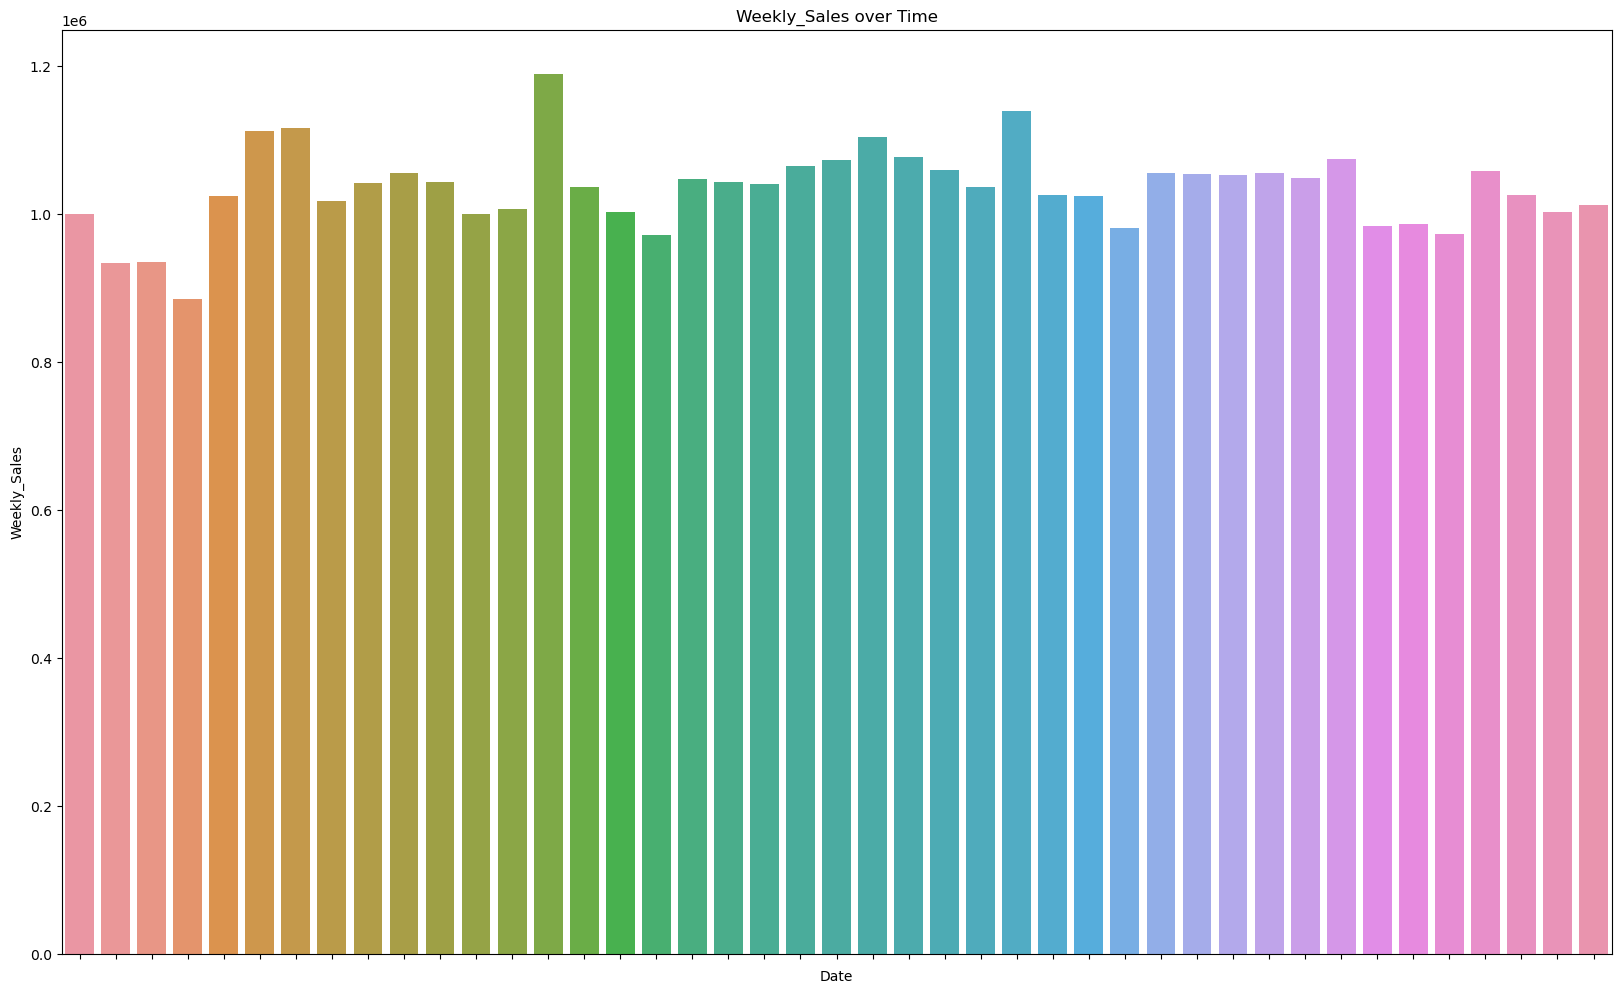

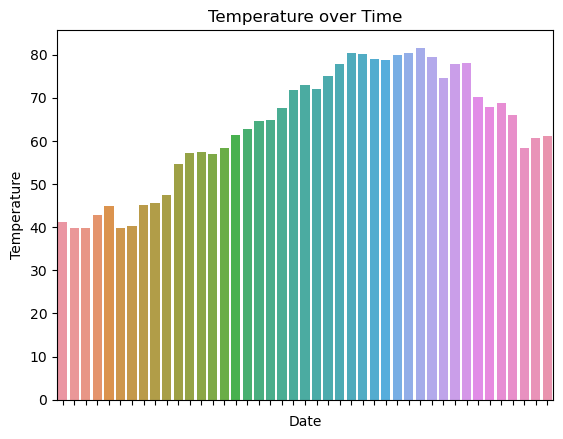

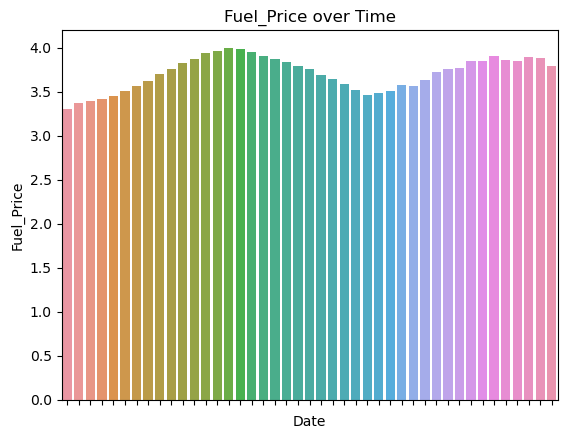

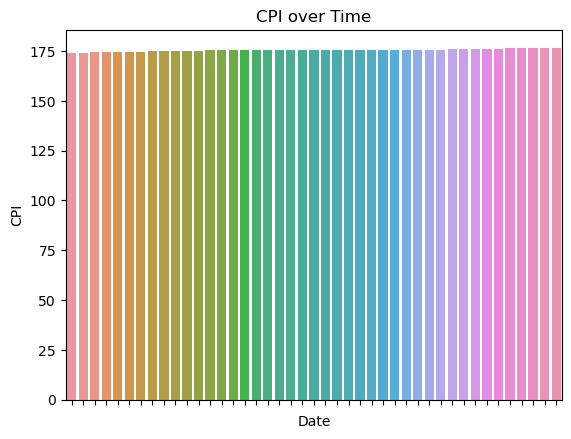

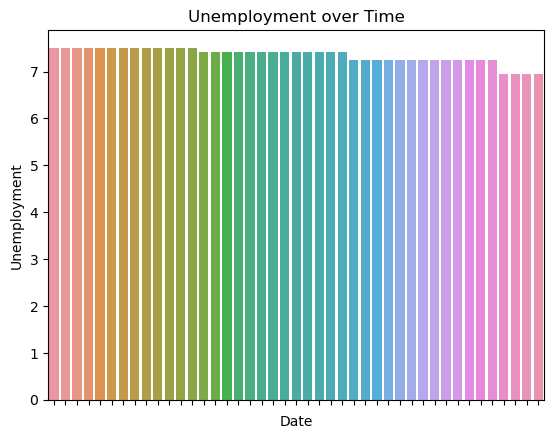

In [31]:
# Set up the matplotlib figure
plt.figure(figsize=(20,12))  # Adjust the figure size as needed

# Loop through the columns and create a plot for each
for column in columns:
    sns.barplot(data=df, x="Date", y=column, errorbar=None)

    # Remove the x labels
    plt.gca().set_xticklabels([])
    
    # Set the title and labels
    plt.title(f'{column} over Time')
    plt.xlabel('Date')
    plt.ylabel(column)

    # Show the plot
    plt.show()

In [18]:
### Week Wise Sales Analysis

In [19]:
# Extract month from 'Date' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012


In [20]:
grouped = df.groupby(["Year",'Month'])

In [21]:
grouped['Weekly_Sales'].sum()

Year  Month
2010  2        1.903330e+08
      3        1.819198e+08
      4        2.314124e+08
      5        1.867109e+08
      6        1.922462e+08
      7        2.325801e+08
      8        1.876401e+08
      9        1.772679e+08
      10       2.171618e+08
      11       2.028534e+08
      12       2.887605e+08
2011  1        1.637040e+08
      2        1.863313e+08
      3        1.793564e+08
      4        2.265265e+08
      5        1.816482e+08
      6        1.897734e+08
      7        2.299114e+08
      8        1.885993e+08
      9        2.208477e+08
      10       1.832613e+08
      11       2.101624e+08
      12       2.880781e+08
2012  1        1.688945e+08
      2        1.920636e+08
      3        2.315097e+08
      4        1.889209e+08
      5        1.887665e+08
      6        2.406103e+08
      7        1.875095e+08
      8        2.368508e+08
      9        1.806455e+08
      10       1.843617e+08
Name: Weekly_Sales, dtype: float64

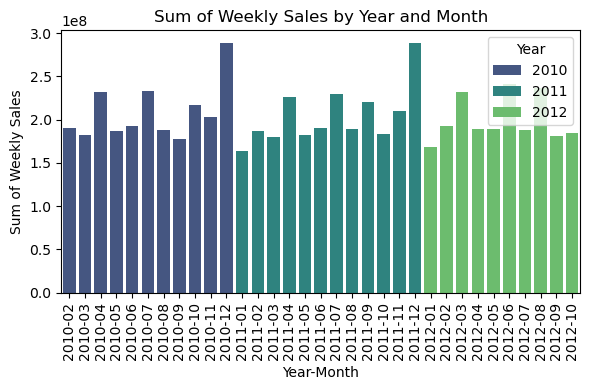

In [22]:
df['Year-Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)

grouped = df.groupby(['Year-Month', 'Year'])['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='Year-Month', y='Weekly_Sales', hue='Year', dodge=False, palette='viridis', data=grouped)

plt.xticks(rotation=90)
plt.xlabel('Year-Month')
plt.ylabel('Sum of Weekly Sales')
plt.title('Sum of Weekly Sales by Year and Month')
plt.tight_layout()
plt.show()

In [23]:
df_2010 = df[df['Year']== 2010]
df_2010.drop(['Year-Month'], axis=1,inplace= True)

C:\Users\sidiq\miniconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
df_2010

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010
...,...,...,...,...,...,...,...,...,...,...
6335,45,2010-12-03,879244.90,0,40.93,3.046,182.667615,8.724,12,2010
6336,45,2010-12-10,1002364.34,0,30.54,3.109,182.551954,8.724,12,2010
6337,45,2010-12-17,1123282.85,0,30.51,3.140,182.517732,8.724,12,2010
6338,45,2010-12-24,1682862.03,0,30.59,3.141,182.544590,8.724,12,2010


In [25]:
df_2011 = df[df['Year']== 2011]
df_2011.drop(['Year-Month'], axis=1,inplace= True)

C:\Users\sidiq\miniconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
df_2012 = df[df['Year']== 2012]
df_2012.drop(['Year-Month'], axis=1,inplace= True)

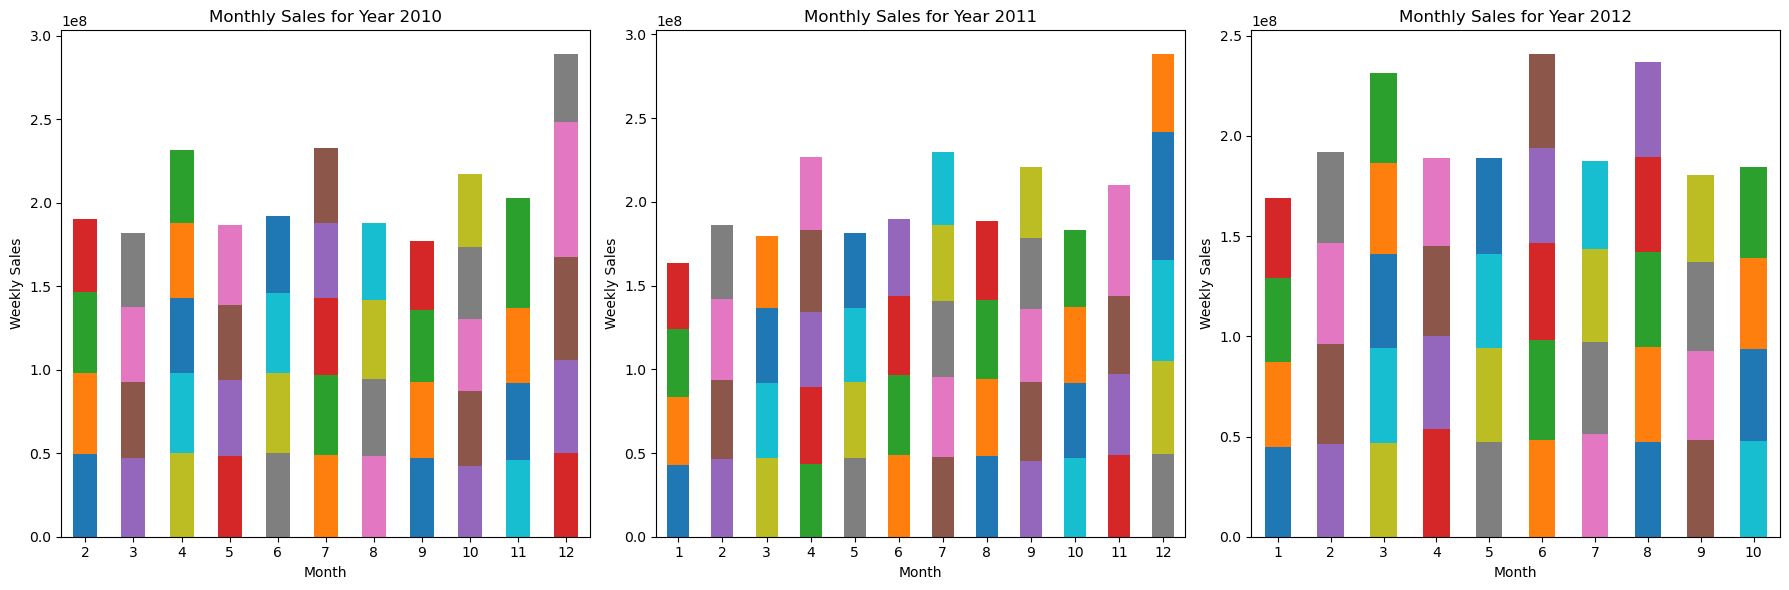

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Titles for each subplot
titles = ['Monthly Sales for Year 2010', 'Monthly Sales for Year 2011', 'Monthly Sales for Year 2012']

# DataFrames list
dfs = [df_2010, df_2011, df_2012]

# Loop through each DataFrame and plot on the respective subplot
for i, df in enumerate(dfs):
    # Group the data by Month, then Date, and sum the Weekly_Sales
    grouped = df.groupby(['Month', 'Date'])['Weekly_Sales'].sum().unstack(fill_value=0)
    
    # Plot the stacked bar graph on the ith subplot
    grouped.plot(kind='bar', stacked=True, legend=False, ax=axes[i], title=titles[i])
    
    # Set x and y labels
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Weekly Sales')
    
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=0)
    
    # Remove the legend
    axes[i].legend().set_visible(False)

plt.tight_layout()
plt.show()